In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
LOGDIR = './results/'
Ls = 1024
Fs = 1000

d_a   = np.genfromtxt(LOGDIR+'double.log', delimiter=',')
f_a   = np.genfromtxt(LOGDIR+'float.log', delimiter=',')
hf_a  = np.genfromtxt(LOGDIR+'float_16_5.log', delimiter=',')
bf_a  = np.genfromtxt(LOGDIR+'float_16_8.log', delimiter=',')
p32_a = np.genfromtxt(LOGDIR+'posit_32.log', delimiter=',')
p28_a = np.genfromtxt(LOGDIR+'posit_28.log', delimiter=',')
p24_a = np.genfromtxt(LOGDIR+'posit_24.log', delimiter=',')
p20_a = np.genfromtxt(LOGDIR+'posit_20.log', delimiter=',')
p16_a = np.genfromtxt(LOGDIR+'posit_16.log', delimiter=',')
p14_a = np.genfromtxt(LOGDIR+'posit_14.log', delimiter=',')
p12_a = np.genfromtxt(LOGDIR+'posit_12.log', delimiter=',')
p10_a = np.genfromtxt(LOGDIR+'posit_10.log', delimiter=',')
p8_a  = np.genfromtxt(LOGDIR+'posit_8.log', delimiter=',')

In [3]:
def comp_fft(array):
    array_ = array/Ls
    PS2 = np.sqrt(array_[2]**2+(array_[3])**2)#/Ls
    PS1 = PS2[0:Ls//2]
    PS1[1:-1] = 2*PS1[1:-1]

    f = Fs*np.arange(Ls//2)/Ls

    return [f, PS1]


In [4]:
def plot_fft(array, ax=None):
    array_ = array/Ls
    PS2 = np.sqrt(array_[2]**2+(array_[3])**2)#/Ls
    PS1 = PS2[0:Ls//2]
    PS1[1:-1] = 2*PS1[1:-1]

    f = Fs*np.arange(Ls//2)/Ls
    if type(ax) is matplotlib.axes._subplots:
        ax.plot(f,PS1)
    else:
        plt.plot(f,PS1)
    # plt.show()

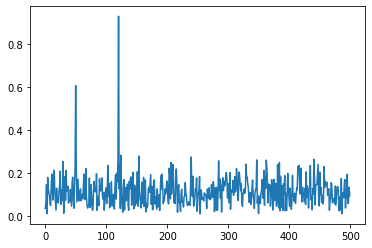

In [5]:
plot_fft(d_a)

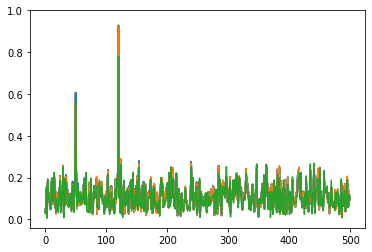

In [6]:
for arr in [d_a ,f_a ,hf_a ,bf_a ,p32_a ,p28_a ,p24_a ,p20_a ,p16_a ,p14_a ,p12_a ,p10_a ,p8_a]:
    plot_fft(arr)

plt.ylim(top=1)
plt.show()

In [7]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] + ['#bd8624', '#00807f']

colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf',
 '#bd8624',
 '#00807f']

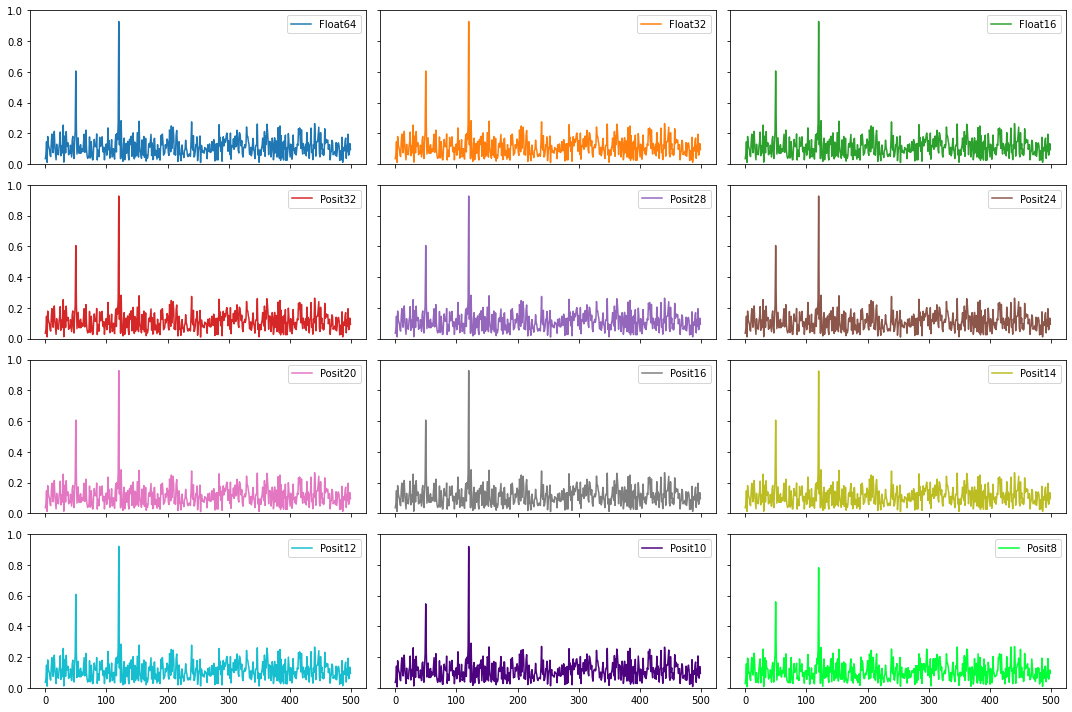

In [8]:
fig, axs = plt.subplots(4,3, figsize=(15,10), sharey=True) # 

# axs[0,0].ylim(top=1)

axs[0,0].set_ylim(top=1)
axs[1,0].set_ylim(top=1)
axs[2,0].set_ylim(top=1)
axs[3,0].set_ylim(top=1)

# Need set color (just 10 in default palette)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] + ['#4d027f', '#00ff37', '#bd8624', '#00807f']
ci = 0

f, PS1 = comp_fft(d_a)
axs[0,0].plot(f, PS1, label='Float64', color=colors[ci])
ci+=1

f, PS1 = comp_fft(f_a)
axs[0,1].plot(f, PS1, label='Float32', color=colors[ci])
ci+=1

hf, PS1 = comp_fft(hf_a)
axs[0,2].plot(hf, PS1, label='Float16', color=colors[ci])
ci+=1
##
p32, PS1 = comp_fft(p32_a)
axs[1,0].plot(p32, PS1, label='Posit32', color=colors[ci])
ci+=1

p28, PS1 = comp_fft(p28_a)
axs[1,1].plot(p28, PS1, label='Posit28', color=colors[ci])
ci+=1

p24, PS1 = comp_fft(p24_a)
axs[1,2].plot(p24, PS1, label='Posit24', color=colors[ci])
ci+=1
##
p20, PS1 = comp_fft(p20_a)
axs[2,0].plot(p20, PS1, label='Posit20', color=colors[ci])
ci+=1

p16, PS1 = comp_fft(p16_a)
axs[2,1].plot(p16, PS1, label='Posit16', color=colors[ci])
ci+=1

p14, PS1 = comp_fft(p14_a)
axs[2,2].plot(p14, PS1, label='Posit14', color=colors[ci])
ci+=1
##
p12, PS1 = comp_fft(p12_a)
axs[3,0].plot(p12, PS1, label='Posit12', color=colors[ci])
ci+=1

p10, PS1 = comp_fft(p10_a)
axs[3,1].plot(p10, PS1, label='Posit10', color=colors[ci])
ci+=1

p8, PS1 = comp_fft(p8_a)
axs[3,2].plot(p8, PS1, label='Posit8', color=colors[ci])
ci+=1
##


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.legend()

plt.tight_layout()
plt.savefig('fft.pdf', bbox_inches='tight')
# plt.savefig('fft.png', bbox_inches='tight', dpi=500)
plt.show()

In [12]:
import seaborn as sb

sb.set_theme()
sb.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

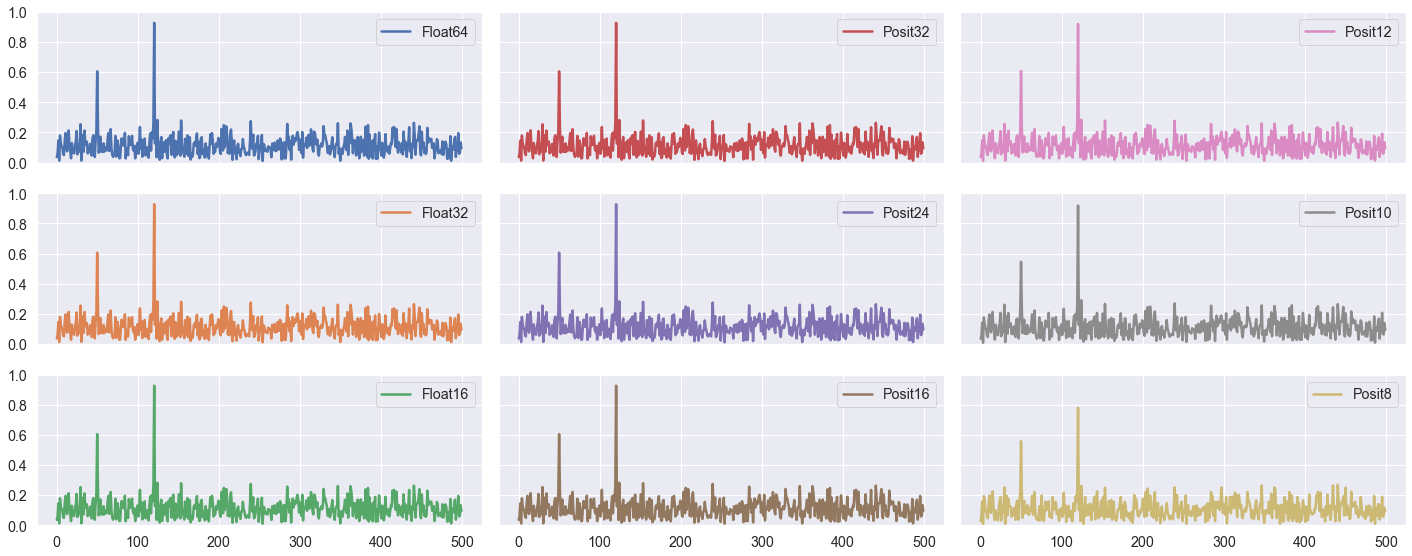

In [18]:
fig, axs = plt.subplots(3,3, figsize=(20,8), sharey=True) # 

# axs[0,0].ylim(top=1)

axs[0,0].set_ylim(top=1)
axs[1,0].set_ylim(top=1)
axs[2,0].set_ylim(top=1)

# Need set color (just 10 in default palette)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] + ['#4d027f', '#00ff37', '#bd8624', '#00807f']
ci = 0

f, PS1 = comp_fft(d_a)
axs[0,0].plot(f, PS1, label='Float64', color=colors[ci])
ci+=1

f, PS1 = comp_fft(f_a)
axs[1,0].plot(f, PS1, label='Float32', color=colors[ci])
ci+=1

hf, PS1 = comp_fft(hf_a)
axs[2,0].plot(hf, PS1, label='Float16', color=colors[ci])
ci+=1
##
p32, PS1 = comp_fft(p32_a)
axs[0,1].plot(p32, PS1, label='Posit32', color=colors[ci])
ci+=1

p24, PS1 = comp_fft(p24_a)
axs[1,1].plot(p24, PS1, label='Posit24', color=colors[ci])
ci+=1

p16, PS1 = comp_fft(p16_a)
axs[2,1].plot(p16, PS1, label='Posit16', color=colors[ci])
ci+=1
##
p12, PS1 = comp_fft(p12_a)
axs[0,2].plot(p12, PS1, label='Posit12', color=colors[ci])
ci+=1

p10, PS1 = comp_fft(p10_a)
axs[1,2].plot(p10, PS1, label='Posit10', color=colors[ci])
ci+=1

p8, PS1 = comp_fft(p8_a)
axs[2,2].plot(p8, PS1, label='Posit8', color=colors[ci])
ci+=1
##


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.legend()

plt.tight_layout()
# plt.savefig('fft.pdf', bbox_inches='tight')
plt.savefig('fft.png', bbox_inches='tight', dpi=800)
plt.show()